# Programming Assignment 5
* CSCI-5930 ML Spring 2019  
* Author: Bhuwan Sapkota

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from random import sample
from scipy.special import comb
from scipy import mean
from itertools import combinations
from scipy.spatial.distance import cosine
from scipy.spatial.distance import squareform

# these two imports are for dendrogram not for hierarchy clustering
# I am implementing hierarchy on my own from scratch.
from scipy.cluster.hierarchy import linkage
from scipy.cluster import hierarchy

#third column need to represent the color value of points to plot not the z co-ordinate
def scatterPlot (centroids,points,plotTitle = "Spiral Dataset"):
    plt.figure(num=None, figsize=(6, 6), dpi=80)
    colorArray = []
    for i in points[:,2]:
        if i == 1:
            colorArray.append("b")
        elif i == 2:
            colorArray.append("g")
        elif i == 3:
            colorArray.append("r")
        else:
            colorArray.append("y")
    plt.scatter(points[:,0],points[:,1],facecolor="none", edgecolors=colorArray, s=30)
    plt.scatter(centroids[:,0],centroids[:,1],facecolor="none",edgecolors="m",marker="*",s=150)
    plt.title(plotTitle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def distance (x,y):
    return (np.sum([(np.abs(a-b))**2 for a, b in zip(x, y)])**(1/2))

    
def KMeanScratch(data, k, maxIter = 100, tol=0.001):
    centroids = sample(list(data), k)
    cluestedTypeArray = []
    for i in range(maxIter):
        classifications = []
        cluestedTypeArray.clear()
        for i in range(k):
            classifications.append([])

        for point in data:
                distances = [distance(x=point,y=c) for c in centroids]
                classification = distances.index(min(distances))
                classifications[classification].append(point)
                cluestedTypeArray.append(classification+1)

        prev_centroids = centroids
        
        centroids.clear()
        for c in classifications:
            if not len(c) == 0:
                centroids.append(np.average(c,axis=0))

        for pc,cc in zip(centroids,prev_centroids):
            original_centroid = pc
            current_centroid = cc
            if np.sum(np.linalg.norm(original_centroid-current_centroid)) > tol:
                print("conversing")
            else:
                break
    clusteredPoints = np.insert(data,2,cluestedTypeArray,axis= 1)          
    return np.asarray(centroids),clusteredPoints

def SSE(centroids, points):
    totalSQsum = 0
    for p in points:
        if p[2] == 1:
            x = distance(p,centroids[0])
        elif p[2] == 2:
            x = distance(p,centroids[1])
        else:
            x = distance(p,centroids[2])
        totalSQsum +=(x**2)
    return totalSQsum

def rand_index (rightCluster, predCluster):
    #creating pairs
    mapping = list(combinations(range(len(rightCluster)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    TP = 0
    TN = 0
    for i in range(len(mapping)):
            if(is_equal((rightCluster[mapping[i][0]],rightCluster[mapping[i][1]])) == is_equal((predCluster[mapping[i][0]],predCluster[mapping[i][1]])) 
               and is_equal((predCluster[mapping[i][0]],predCluster[mapping[i][1]])) == True):
                TP += 1
            if(is_equal((rightCluster[mapping[i][0]],rightCluster[mapping[i][1]])) == is_equal((predCluster[mapping[i][0]],predCluster[mapping[i][1]])) 
               and is_equal((predCluster[mapping[i][0]],predCluster[mapping[i][1]])) == False):
                TN += 1
    denom = comb(len(rightCluster),2)
    ri = (TP + TN) / denom
    return ri

In [2]:
data = pd.read_csv('spiral-dataset.csv', delim_whitespace=True, header=None)

# Task --> 1

In [3]:
plt.xkcd()  # to make fancy plot

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x105dc45f8>

In [4]:
dataA = np.asarray(data)
realCentroid = []
clusters = []
for i in range(3):
    clusters.append([])

for i in range(len(data)):
    if(dataA[i][2] == 1):
        clusters[0].append([dataA[i][0],dataA[i][1]])
    if(dataA[i][2] == 2):
        clusters[1].append([dataA[i][0],dataA[i][1]])
    if(dataA[i][2] == 3):
        clusters[2].append([dataA[i][0],dataA[i][1]])

for i in range(3):
    realCentroid.append(np.average(clusters[i],axis=0)) 

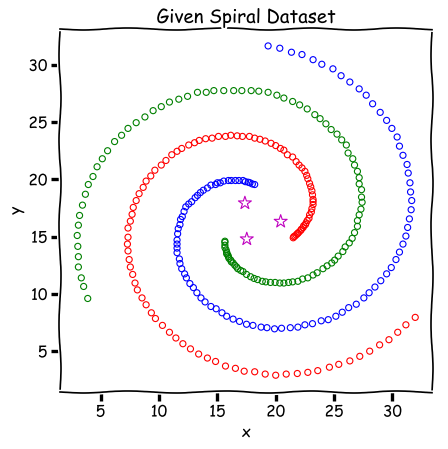

In [5]:
scatterPlot(np.asarray(realCentroid),data.values,"Given Spiral Dataset")

# Task --> 2 and Exra Credit --> E1

In [6]:
points = data.iloc[:,0:-1].values
trueCluster = data.iloc[:,-1].values

In [7]:
trueCluster.shape

(312,)

### 2.a

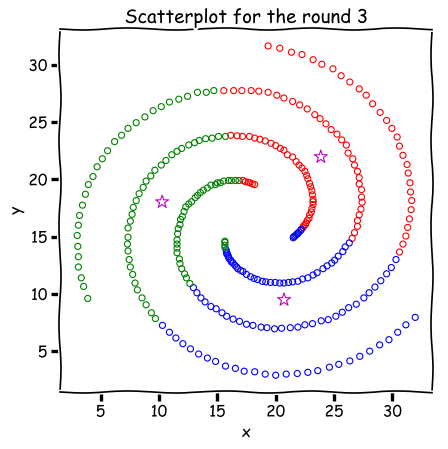

In [8]:
#calculating and plotting all SSE, RI and scatterplot for 10 time.
cntrd,pntWCl = KMeanScratch(data=points,k=3)
scatterPlot(cntrd,pntWCl,"Scatterplot for the round " + str(i+1))

### 2.b

In [9]:
sse = SSE(cntrd,pntWCl)
RI = rand_index(trueCluster,pntWCl[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))

SSE : 12313.275106261695
RI : 0.5542913677961909


### 2.c

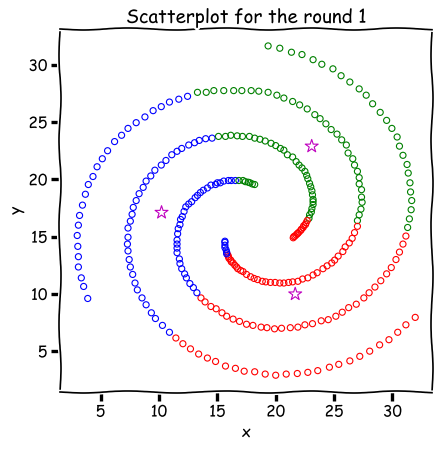

SSE for the round 1 is: 12296.032388086345
RI for round 1 is: 0.5540028031989447



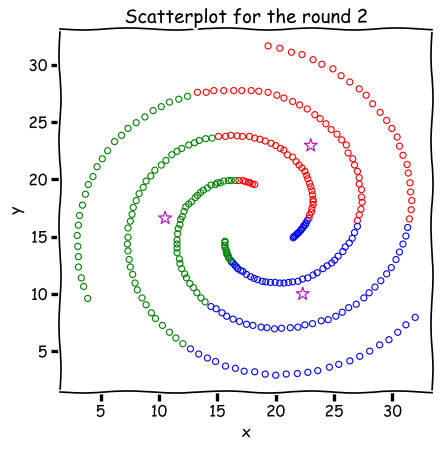

SSE for the round 2 is: 12292.16573667976
RI for round 2 is: 0.5540028031989447



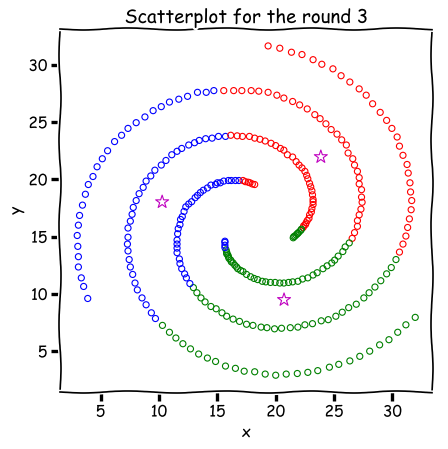

SSE for the round 3 is: 12313.275106261695
RI for round 3 is: 0.5542913677961909



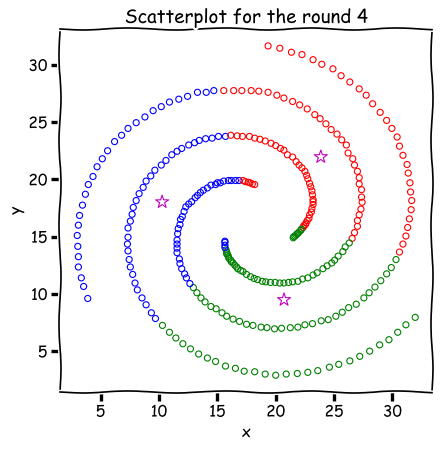

SSE for the round 4 is: 12313.275106261695
RI for round 4 is: 0.5542913677961909



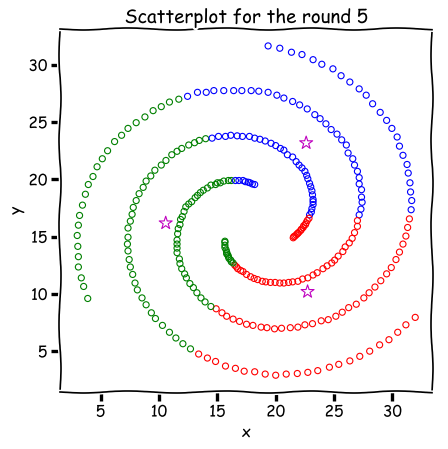

SSE for the round 5 is: 12313.900175402778
RI for round 5 is: 0.554044026712837



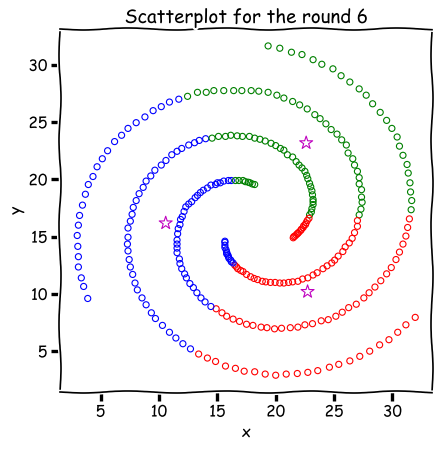

SSE for the round 6 is: 12313.900175402778
RI for round 6 is: 0.554044026712837



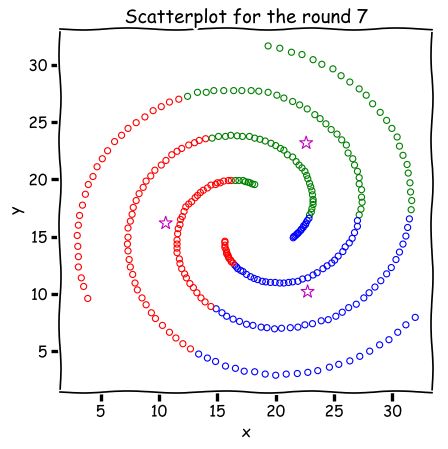

SSE for the round 7 is: 12313.900175402778
RI for round 7 is: 0.554044026712837



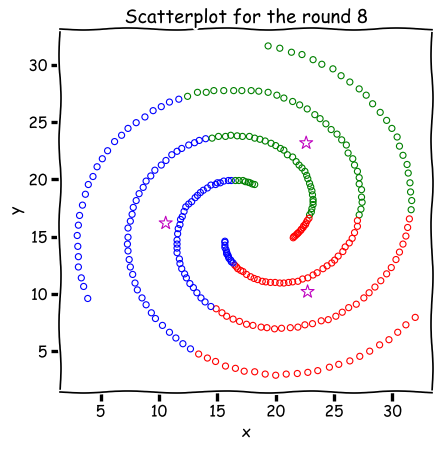

SSE for the round 8 is: 12313.900175402778
RI for round 8 is: 0.554044026712837



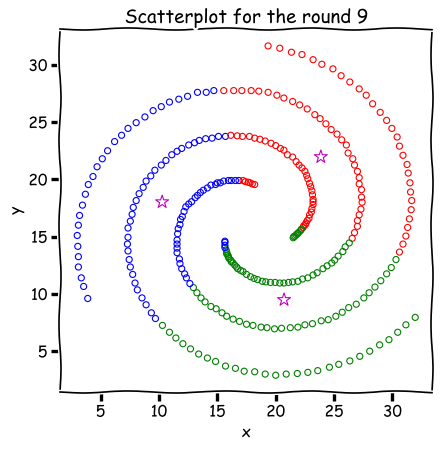

SSE for the round 9 is: 12313.275106261695
RI for round 9 is: 0.5542913677961909

Best SSE among all rounds is: 12292.16573667976
Best RI among all rounds is: 0.5542913677961909


In [10]:
#nine more time
bestSSE = sse
bestRI = RI
for i in range(9):
    cntrd,pntWCl = KMeanScratch(data=points,k=3)
    print()
    scatterPlot(cntrd,pntWCl,"Scatterplot for the round " + str(i+1))
    sse = SSE(cntrd,pntWCl)
    print("SSE for the round "+str(i+1)+" is: " +str(sse))
    if (sse < bestSSE):
        bestSSE = sse
    
    RI = rand_index(trueCluster,pntWCl[:,-1])
    print("RI for round "+str(i+1)+" is: " + str(RI))
    if RI > bestRI:
        bestRI = RI
print("\nBest SSE among all rounds is: " + str(bestSSE))
print("Best RI among all rounds is: " + str(bestRI))

# Task --> 3 inclucing (Exra Credit --> E2 and E3)

In [11]:
def linkageVal (setA,setB,typeofLinkage,distanceType):    
    optimalval = None
    if typeofLinkage == "single":
        optimalval = 10000000
        for i in setA:
            for j in setB:
                if distanceType == "L2":
                    d = np.linalg.norm(np.asarray(i)-np.asarray(j))
#                     print(d)
                elif distanceType == "cosine":
                    d = cosine(np.asarray(i),np.asarray(j))
                else:
                    d = (np.sum((np.abs(np.asarray(i)-np.asarray(j)))**3))**(1/3)
                if d < optimalval:
                    optimalval = d
    elif typeofLinkage == "complete":
        optimalval = 0
        for i in setA:
            for j in setB:
                if distanceType == "L2":
                    d = np.linalg.norm(np.asarray(i)-np.asarray(j))
                elif distanceType == "cosine":
                    d = cosine(np.asarray(i),np.asarray(j))
                else:
                    d = (np.sum((np.abs(np.asarray(i)-np.asarray(j)))**3))**(1/3)
                if d > optimalval:
                    optimalval = d
    elif typeofLinkage == "average":
        optimalval = 10000000
        total = 0
        count = 0
        for i in setA:
            for j in setB:
                count += 1
                if distanceType == "L2":
                    total += np.linalg.norm(np.asarray(i)-np.asarray(j))
                elif distanceType == "cosine":
                    total += cosine(np.asarray(i),np.asarray(j))
                else:
                    total += (np.sum((np.abs(np.asarray(i)-np.asarray(j)))**3))**(1/3)
        optimalval = total/count   
    else:
        if distanceType == "L2":
            optimalval = np.linalg.norm(np.average(np.asarray(setA),axis=0) - np.average(np.asarray(setB),axis=0))
        elif distanceType == "cosine":
            optimalval = cosine(np.average(np.asarray(setA),axis=0), np.average(np.asarray(setB),axis=0))
        else:
            optimalval = (np.sum((np.abs(np.average(np.asarray(setA),axis=0)-np.average(np.asarray(setB),axis=0)))**3))**(1/3)
    return optimalval


def hierarchical(points, k, typeofLinkage,distanceType):    
    #initially giving each point its own cluster number
    clster = {}
    for i in range(len(points)):
        clster[i] = [points[i]]
        
    mat = computeMatrix(clster,typeofLinkage,distanceType)
    while(len(clster) > k):
        optimal = 10000000
        first = 1000000
        second = 1000000
        temp = 1000000
        for i in range(len(mat)):
            for j in range(i,len(mat[0])):
                if i == j:
                    temp = 10000000  # just large number
                else:
                    temp = mat[i][j]
                if temp < optimal:
                    optimal = temp
                    first = i
                    second = j
        mat = np.delete(mat, second, 0)
        mat = np.delete(mat, second, 1)
        
        
        newclster = {}
        for i in range(len(clster)-1):
            if i == first:
                newclster[i] = clster[i]
                for cls in clster[second]:
                    newclster[i].append(cls)
            elif i > second-1:
                newclster[i] = clster[i+1]
            else:
                newclster[i] = clster[i]
        clster = newclster
        for i in range(len(mat)):
            if not i == first:
                mat[i][first] = linkageVal(clster[i],clster[first],typeofLinkage,distanceType)
                mat[first][i] = mat[i][first]
        
    allpnts = []
    centroids = []
    for no,sets in clster.items():
        centroids.append(np.average(sets,axis=0))
        for item in sets:
            allpnts.append([item[0],item[1],no+1])
    return np.asarray(centroids),np.asarray(allpnts)
            

def computeMatrix(cluster, typeofLinkage,distanceType):
    disMatx = np.asarray([[None]*(len(cluster))])
    disMatx = np.delete(disMatx,0,0)  # deleting that first None row.
    for i in cluster.values():
        row = np.asarray([ 0.0 if i==j else linkageVal(i,j,typeofLinkage, distanceType) for j in cluster.values()])
        disMatx = np.append(disMatx,[row],axis=0)
    return disMatx
            

### 3.a "single"

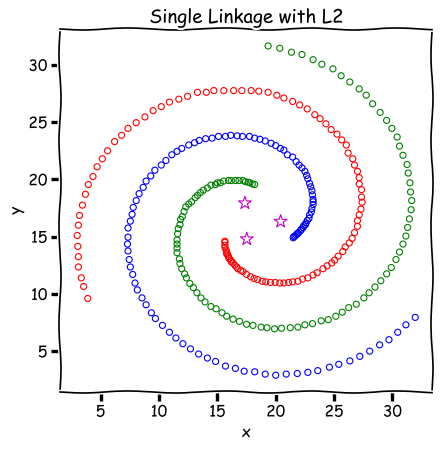

SSE : 30109.350350293127
RI : 1.0


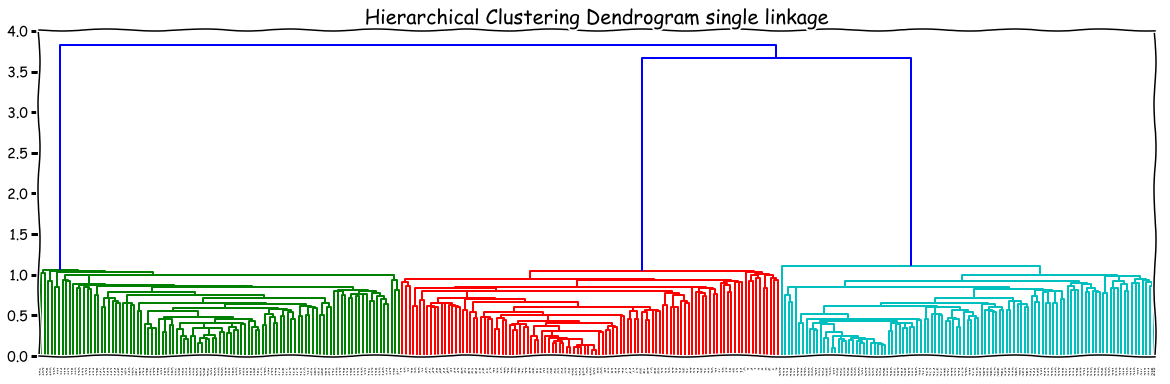

In [12]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="single",distanceType = "L2")
scatterPlot(centroids, np.asarray(pointWithClNo),"Single Linkage with L2")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
bestSSE = sse
bestRI = RI
# matrix = computeMatrix(clusters1,typeofLinkage="single")
# dists = squareform(matrix)
Z = linkage(points, 'single')
plt.figure(figsize=(20,6))
plt.title('Hierarchical Clustering Dendrogram single linkage', fontsize=20)
dn = hierarchy.dendrogram(Z)

### 3.b "complete"

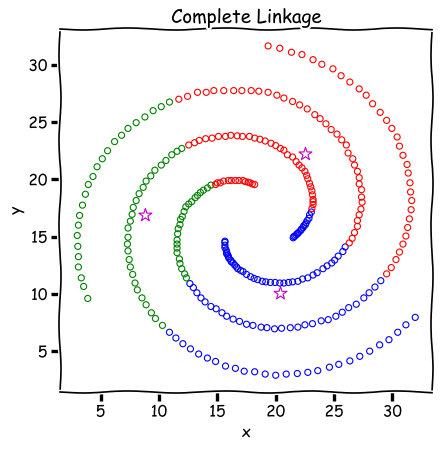

SSE : 13004.374230289619
RI : 0.9033308599224998


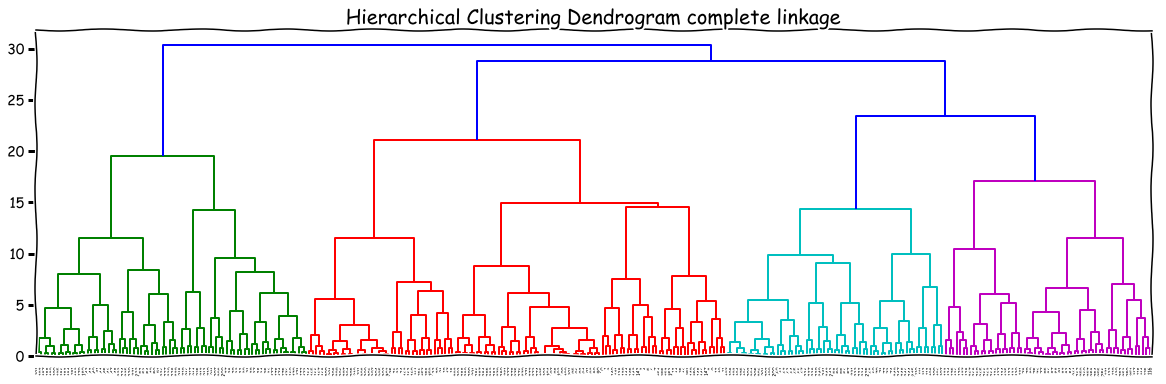

In [13]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="complete",distanceType = "L2")
scatterPlot(centroids, np.asarray(pointWithClNo),"Complete Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI
    
# matrix = computeMatrix(clusters1,typeofLinkage="single")
# dists = squareform(matrix)
Z = linkage(points, 'complete')
plt.figure(figsize=(20,6))
plt.title('Hierarchical Clustering Dendrogram complete linkage', fontsize=20)
dn = hierarchy.dendrogram(Z)

### 3.c "average"

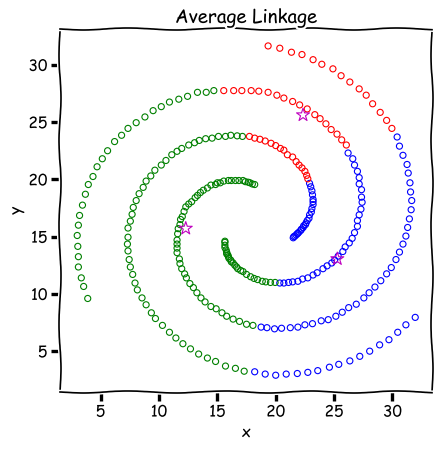

SSE : 14132.153816169079
RI : 0.8177096215681424


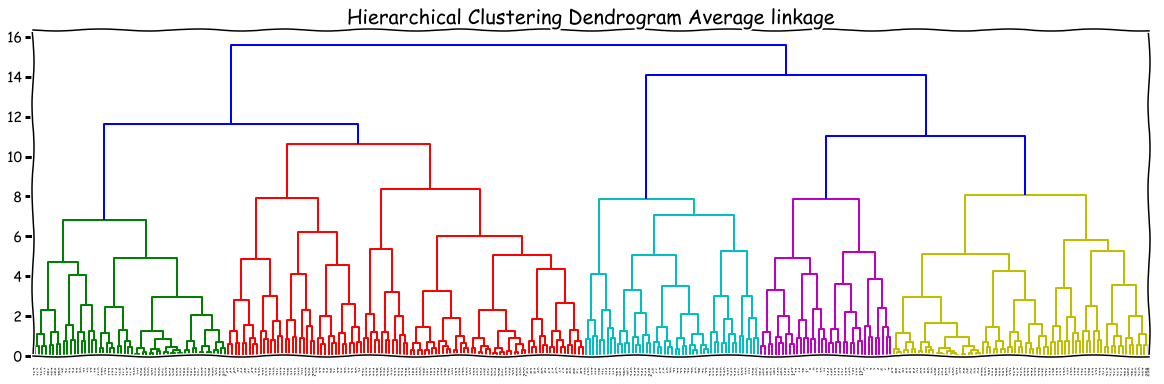

In [14]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="average",distanceType = "L2")
scatterPlot(centroids, np.asarray(pointWithClNo),"Average Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI
    
# matrix = computeMatrix(clusters1,typeofLinkage="single")
# dists = squareform(matrix)
Z = linkage(points, 'average')
plt.figure(figsize=(20,6))
plt.title('Hierarchical Clustering Dendrogram Average linkage', fontsize=20)
dn = hierarchy.dendrogram(Z)

### 3.d "centroid"

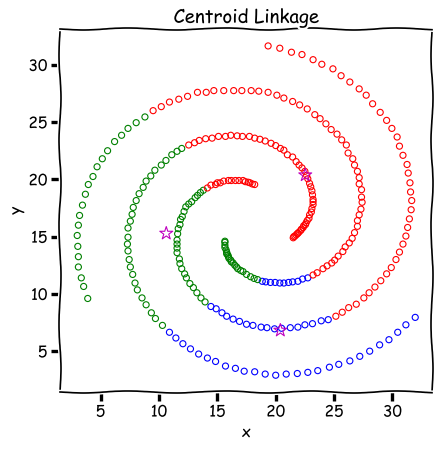

SSE : 14636.18931606819
RI : 0.7256781268035287


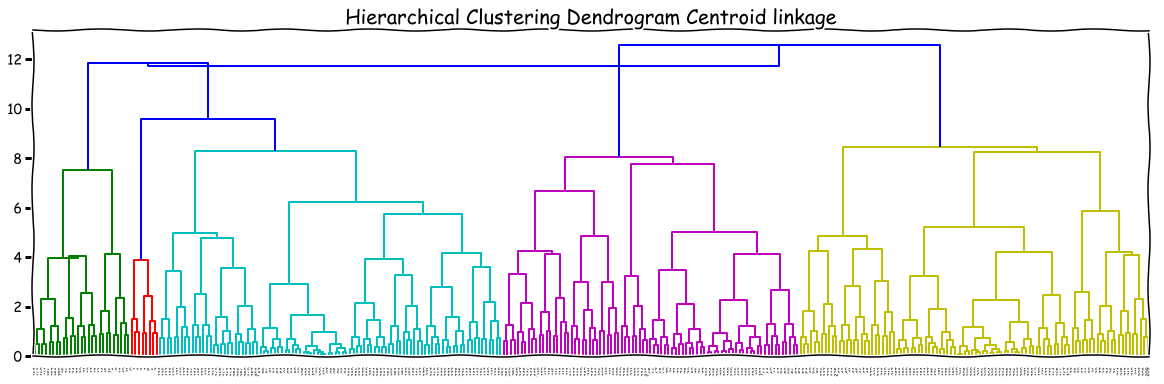

In [15]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="centroid",distanceType = "L2")
scatterPlot(centroids, np.asarray(pointWithClNo),"Centroid Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI
    
# matrix = computeMatrix(clusters1,typeofLinkage="single")
# dists = squareform(matrix)
Z = linkage(points, 'centroid')
plt.figure(figsize=(20,6))
plt.title('Hierarchical Clustering Dendrogram Centroid linkage', fontsize=20)
dn = hierarchy.dendrogram(Z)

### 3.e comment

In [16]:
print("\nBest SSE among all rounds is: " + str(bestSSE))
print("Best RI among all rounds is: " + str(bestRI))

#don't forget to comment about the result.


Best SSE among all rounds is: 13004.374230289619
Best RI among all rounds is: 1.0


#### The best SSE I got among four is Complete linkage becacause it only care about the distribution of  points from its centroid while merging. Complete linkage good on doing so.
#### Best RI index I got is single linkage because it focus more on distance between adjacent points while merging hierarchical clusters. Single linkage is the best for given data set. 

# Exra Credit --> E4 (Every Steps of Task 3 with cosine similarity)

### 3.a "single"

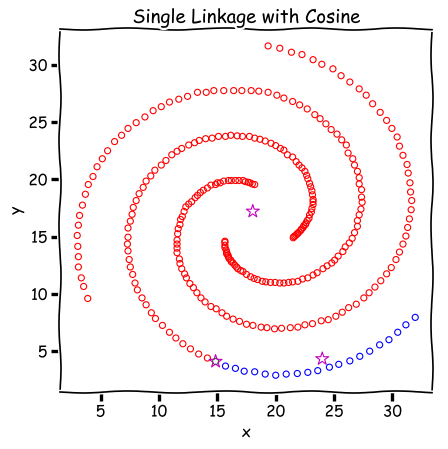

SSE : 27309.631514175257
RI : 0.38329623217083025


In [17]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="single",distanceType = "cosine")
scatterPlot(centroids, np.asarray(pointWithClNo),"Single Linkage with Cosine")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
bestSSE = sse
bestRI = RI
# matrix = computeMatrix(clusters1,typeofLinkage="single")
# dists = squareform(matrix)

### 3.b "complete"

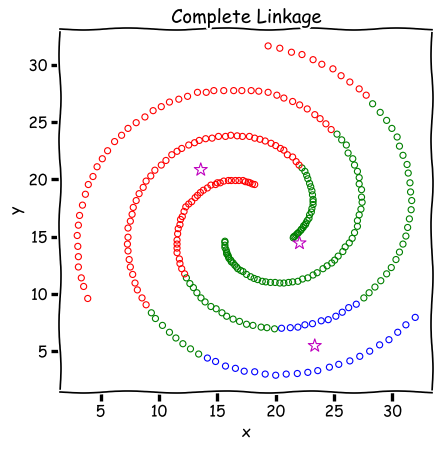

SSE : 18132.51173482901
RI : 0.7289966196718608


In [18]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="complete",distanceType = "cosine")
scatterPlot(centroids, np.asarray(pointWithClNo),"Complete Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI

### 3.c "average"

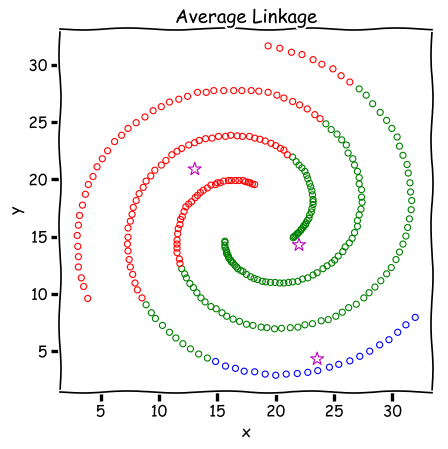

SSE : 18525.42535427178
RI : 0.7382719102976337


In [19]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="average",distanceType = "cosine")
scatterPlot(centroids, np.asarray(pointWithClNo),"Average Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI

### 3.d "centroid"

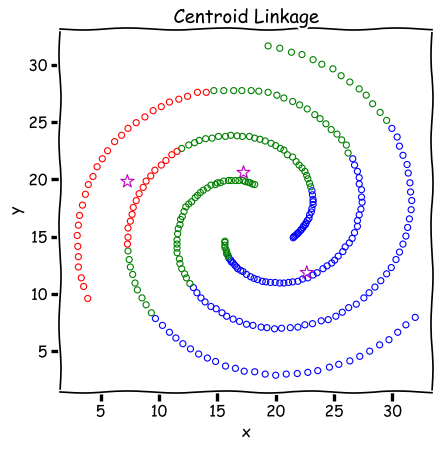

SSE : 17279.55087766175
RI : 0.7276568554703603


In [20]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="centroid",distanceType = "cosine")
scatterPlot(centroids, np.asarray(pointWithClNo),"Centroid Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI

### 3.e comment

In [21]:
print("\nBest SSE among all rounds is: " + str(bestSSE))
print("Best RI among all rounds is: " + str(bestRI))

#don't forget to comment about the result.


Best SSE among all rounds is: 17279.55087766175
Best RI among all rounds is: 0.7382719102976337


#### The best SSE with cosine similarity I got among four is Centroid linkage. 
#### Best RI index I got is Average linkage with cosine similarity. 

# Exra Credit --> E5 (Every Step of Task 3 with L3 Distance)

### 3.a "single"

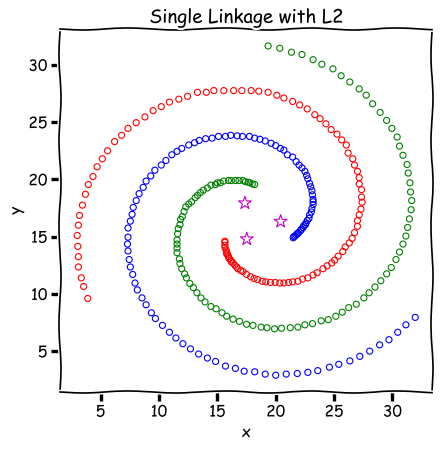

SSE : 30109.350350293127
RI : 1.0


In [22]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="single",distanceType = "L3")
scatterPlot(centroids, np.asarray(pointWithClNo),"Single Linkage with L2")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
bestSSE = sse
bestRI = RI

### 3.b "complete"

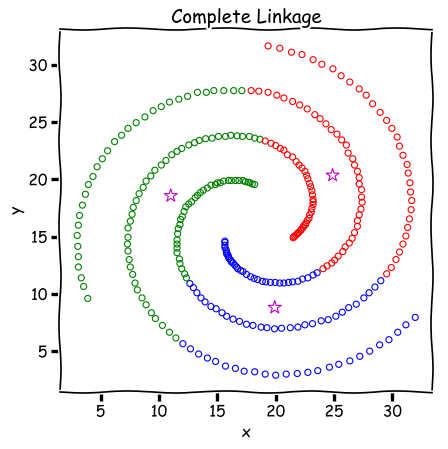

SSE : 12886.454530700159
RI : 0.9290131090774177


In [23]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="complete",distanceType = "L3")
scatterPlot(centroids, np.asarray(pointWithClNo),"Complete Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI

### 3.c "average"

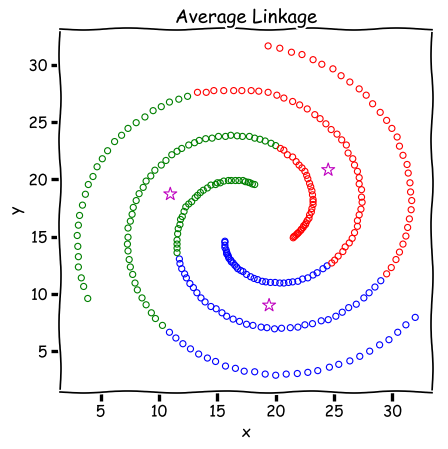

SSE : 13236.695071348096
RI : 0.9589826036771374


In [24]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="average",distanceType = "L3")
scatterPlot(centroids, np.asarray(pointWithClNo),"Average Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI

### 3.d "centroid"

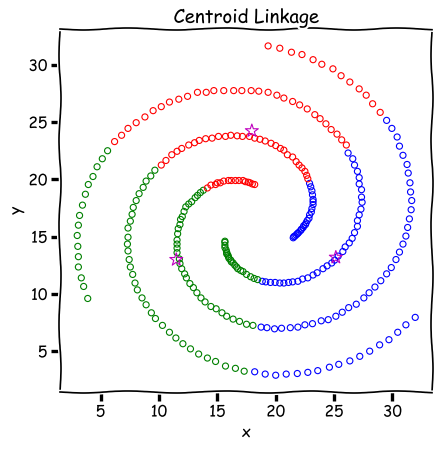

SSE : 12911.512243103703
RI : 0.9104625278258719


In [25]:
# clusters, pointWithClNo = hierarchical(points=sample(points.tolist(),150), k=3,typeofLinkage="single")
centroids, pointWithClNo = hierarchical(points=points.tolist(), k=3,typeofLinkage="centroid",distanceType = "L3")
scatterPlot(centroids, np.asarray(pointWithClNo),"Centroid Linkage")
sse = SSE(centroids,pointWithClNo)

RI = rand_index(trueCluster,pointWithClNo[:,-1])
print("SSE : " + str(sse))
print("RI : " + str(RI))
if (sse < bestSSE):
    bestSSE = sse
if RI > bestRI:
    bestRI = RI

### 3.e comment

In [26]:
print("\nBest SSE among all rounds is: " + str(bestSSE))
print("Best RI among all rounds is: " + str(bestRI))

#don't forget to comment about the result.


Best SSE among all rounds is: 12886.454530700159
Best RI among all rounds is: 1.0


#### The best SSE I got among four is Complete linkage with L3 distance
#### Best RI index I got is single linkage.

# *HAPPY SUMMER*